<a href="https://colab.research.google.com/github/budhiraja03/Practicals/blob/main/Assignment3_ComparisonOfModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**🔹 Workflow Steps**

**1️⃣ Data Loading**

Libraries Used: numpy, pandas, matplotlib.pyplot

Loads the dataset from a CSV file:
```python
df = pd.read_csv('/content/cybersecurity_intrusion_data.csv')
df.head()
```
Drops the "session_id" column, assuming it's not useful for analysis:
```python
    df = df.drop(["session_id"], axis=1)
```

**2️⃣ Data Exploration & Cleaning**

1. Descriptive Statistics: ```df.describe()```
2. Data Information: ```df.info()```, ```df.columns```
3. Missing Values Check: ```df.isna().sum()```
4. Handling Missing Values:
Fills missing values in the "encryption_used" column using its mode:
```python
    df['encryption_used'] = df['encryption_used'].apply(
        lambda x: df['encryption_used'].mode()[0] if pd.isna(x) else x
    )
```    
**3️⃣ Data Visualization and Data Encoding**

Visualizes features vs target variable
```python
    plt.figure(figsize=(8,4))
    sns.histplot(data=num_col,x=c,hue='attack_detected',kde=True,palette=colors)
    sns.countplot(data=num_col,x=c,hue="attack_detected",palette=colors)
    plt.xlabel(c)
    plt.ylabel("number of values")
    plt.title(f"{c} distribution over attack_detected")
    plt.show()
```
Encodes categorical variables using LabelEncoder:
```python
    from sklearn.preprocessing import LabelEncoder

    label_encoder = LabelEncoder()
    data_transformed = df.copy()
    columnsNeedEncoding = []

    for col in df.columns:
        if df[col].dtype == 'object':
            print(f"Unique values of '{col}' is {df[col].unique()}")
            columnsNeedEncoding.append(col)

    for col in columnsNeedEncoding:
        data_transformed[col] = label_encoder.fit_transform(df[col])
```
**4️⃣ Data Scaling**

Standardizes numerical features using StandardScaler:
```python
    from sklearn.preprocessing import StandardScaler

    encode_to_columns = ['network_packet_size', 'login_attempts', 'session_duration',
                        'ip_reputation_score', 'failed_logins']

    scaler = StandardScaler()
    data_transformed[encode_to_columns] = scaler.fit_transform(data_transformed[encode_to_column])
```


##**🔹 Key Machine Learning Steps**

**1️⃣ Train-Test Split**

Splits the dataset into 80% training and 20% testing:
```python
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```
**2️⃣ Train an Initial Decision Tree**

Trains a Decision Tree Classifier with max_depth=3
```python
    from sklearn.tree import DecisionTreeClassifier

    model1 = DecisionTreeClassifier(max_depth=3)
    model1.fit(X_train, y_train)
```
Makes Predictions & Computes Accuracy:
```python
    y_pred = model1.predict(X_test)
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(y_test, y_pred)
```

After this, similarly compute the accuracy and f1-score of Logistic Regression model and Adaboost (base estimator = Decision Tree)

##**🔹Conclusion**

Adaboost outperforms the other two classifier models(Decision Tree and Logistic Regression) because of its highest accuracy and f1-score.

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#780000', '#c1121f', '#fdf0d5', '#003049', '#669bbc']

In [158]:
df = pd.read_csv('/content/cybersecurity_intrusion_data.csv')
df.head()

,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


In [159]:
df = df.drop(["session_id"],axis=1)

In [160]:
df.describe()

,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
count,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000,9537.000000
mean,500.430639,4.032086,792.745312,0.331338,1.517773,0.149942,0.447101
std,198.379364,1.963012,786.560144,0.177175,1.033988,0.357034,0.497220
min,64.000000,1.000000,0.500000,0.002497,0.000000,0.000000,0.000000
25%,365.000000,3.000000,231.953006,0.191946,1.000000,0.000000,0.000000
50%,499.000000,4.000000,556.277457,0.314778,1.000000,0.000000,0.000000
75%,635.000000,5.000000,1105.380602,0.453388,2.000000,0.000000,1.000000
max,1285.000000,13.000000,7190.392213,0.924299,5.000000,1.000000,1.000000


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   network_packet_size  9537 non-null   int64  
 1   protocol_type        9537 non-null   object 
 2   login_attempts       9537 non-null   int64  
 3   session_duration     9537 non-null   float64
 4   encryption_used      7571 non-null   object 
 5   ip_reputation_score  9537 non-null   float64
 6   failed_logins        9537 non-null   int64  
 7   browser_type         9537 non-null   object 
 8   unusual_time_access  9537 non-null   int64  
 9   attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 745.2+ KB


In [162]:
df.isna().sum()

,0
network_packet_size,0
protocol_type,0
login_attempts,0
session_duration,0
encryption_used,1966
ip_reputation_score,0
failed_logins,0
browser_type,0
unusual_time_access,0
attack_detected,0


In [163]:
df['encryption_used'] = df['encryption_used'].apply(lambda x: df['encryption_used'].mode()[0] if pd.isna(x) else x)

In [164]:
df.head(10)

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0
5,453,UDP,5,380.471550,AES,0.422486,2,Chrome,1,0
6,815,ICMP,4,728.107165,AES,0.413772,1,Chrome,0,1
7,653,TCP,3,12.599906,DES,0.097719,3,Chrome,1,1
8,406,TCP,2,542.558895,AES,0.294580,0,Chrome,1,0
9,608,UDP,6,531.944107,AES,0.424117,1,Chrome,0,0


## **Data Visualization**

<ipython-input-205-031c65485b6d>:5: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.histplot(data=num_col,x=c,hue='attack_detected',kde=True,palette=colors)


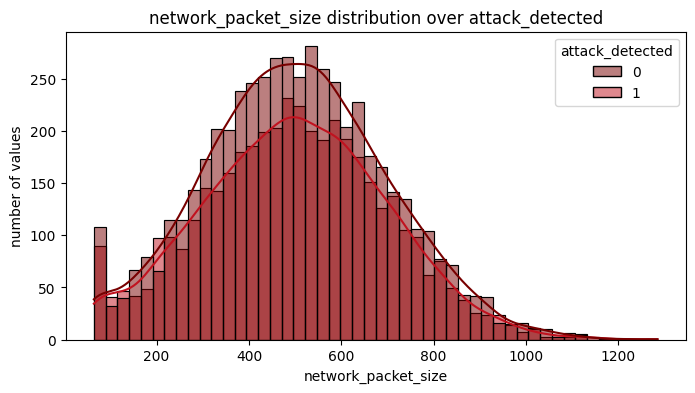

<ipython-input-205-031c65485b6d>:7: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=num_col,x=c,hue="attack_detected",palette=colors)


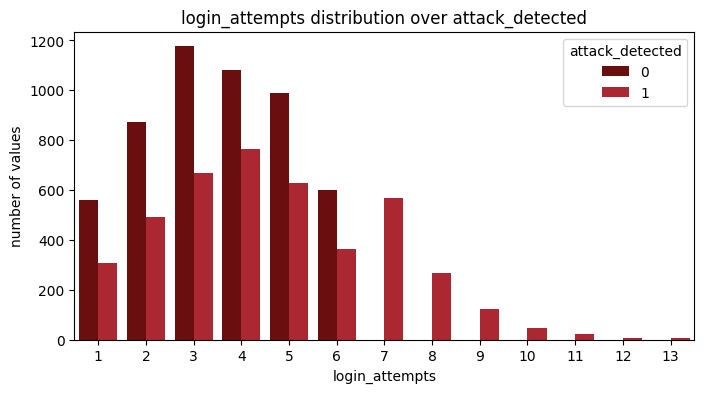

<ipython-input-205-031c65485b6d>:5: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.histplot(data=num_col,x=c,hue='attack_detected',kde=True,palette=colors)


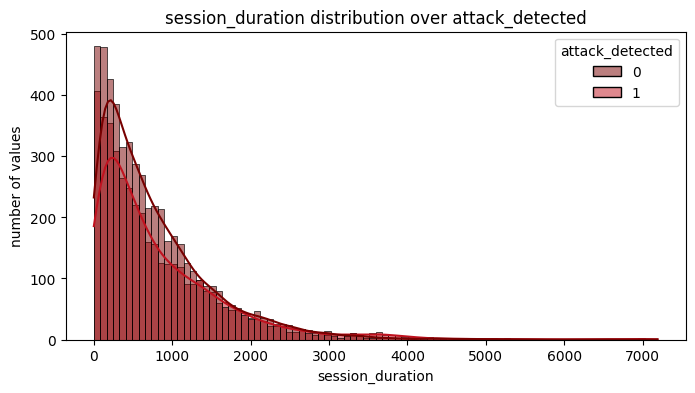

<ipython-input-205-031c65485b6d>:5: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.histplot(data=num_col,x=c,hue='attack_detected',kde=True,palette=colors)


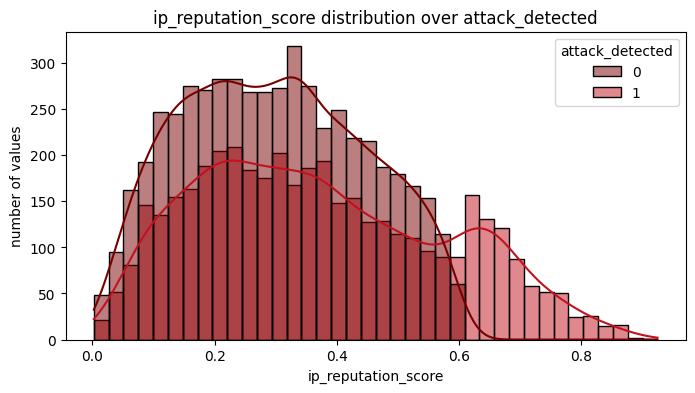

<ipython-input-205-031c65485b6d>:7: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=num_col,x=c,hue="attack_detected",palette=colors)


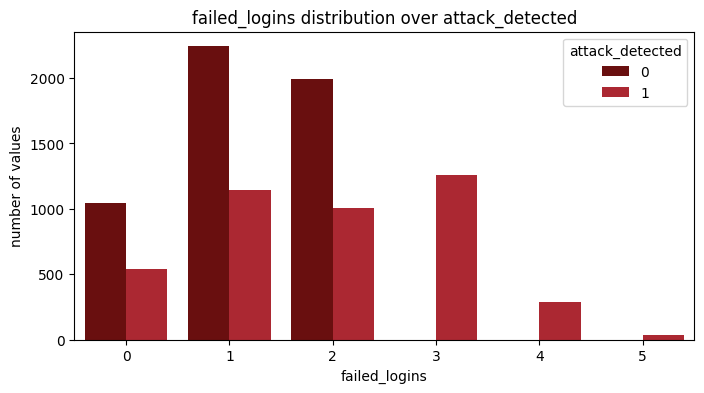

<ipython-input-205-031c65485b6d>:7: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=num_col,x=c,hue="attack_detected",palette=colors)


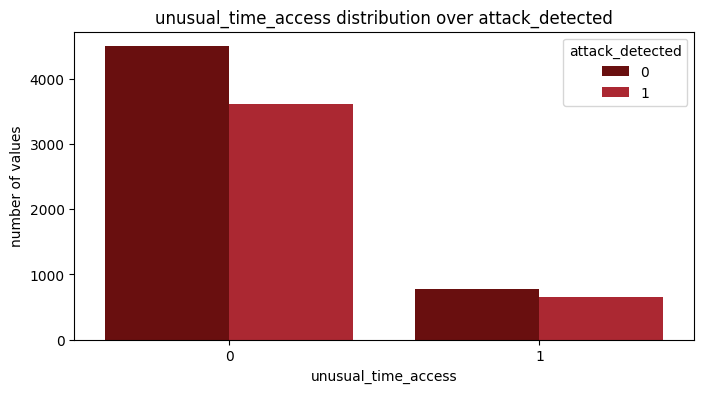

<ipython-input-205-031c65485b6d>:7: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(data=num_col,x=c,hue="attack_detected",palette=colors)


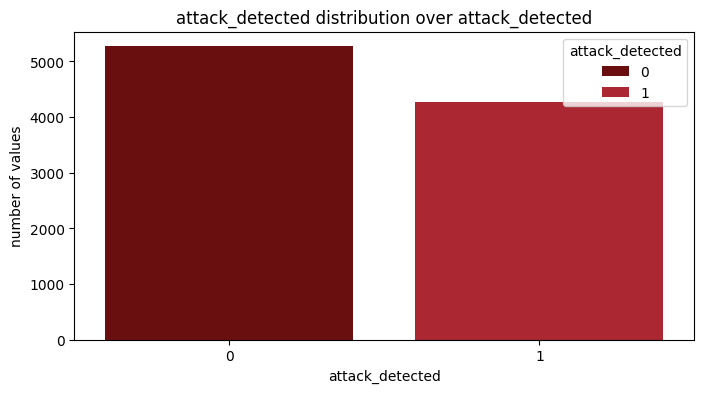

In [205]:
num_col = df.select_dtypes(include=["float64","int64"])
for c in num_col.columns:
    plt.figure(figsize=(8,4))
    if num_col[c].nunique() >15:
        sns.histplot(data=num_col,x=c,hue='attack_detected',kde=True,palette=colors)
    else:
        sns.countplot(data=num_col,x=c,hue="attack_detected",palette=colors)
    plt.xlabel(c)
    plt.ylabel("number of values")
    plt.title(f"{c} distribution over attack_detected")
    plt.show()

## **Label Encoding the Categorical Features**

In [165]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_transformed=df.copy()
columnsNeedEncoding=[]
for i in df.columns:
  if df[i].dtype=='object':
    print(f"Unique values of '{i}' is {df[i].unique()}")
    columnsNeedEncoding.append(i)

Unique values of 'protocol_type' is ['TCP' 'UDP' 'ICMP']
Unique values of 'encryption_used' is ['DES' 'AES']
Unique values of 'browser_type' is ['Edge' 'Firefox' 'Chrome' 'Unknown' 'Safari']


In [166]:
for i in columnsNeedEncoding:
  data_transformed[i]=label_encoder.fit_transform(df[i])

## **Standardized the Numerical Features**

In [167]:
from sklearn.preprocessing import StandardScaler
encode_to_columns = ['network_packet_size','login_attempts','session_duration',
                     'ip_reputation_score','failed_logins']
scaler = StandardScaler()
data_transformed[encode_to_columns] = scaler.fit_transform(df[encode_to_columns])

In [168]:
data_transformed.head(10)

,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,0.496899,1,-0.016346,-0.381125,1,1.554930,-0.500779,1,0,1
1,-0.143322,1,-0.525794,0.972960,1,-0.168029,-1.467959,2,0,0
2,0.648132,1,-0.525794,-0.912503,1,2.301950,0.466400,0,0,1
3,1.530327,2,-0.016346,-0.243473,1,-1.174443,-1.467959,4,0,1
4,-0.239103,1,0.493102,-0.330830,0,-1.560484,-0.500779,2,0,0
5,-0.239103,2,0.493102,-0.524175,0,0.514478,0.466400,0,1,0
6,1.585779,0,-0.016346,-0.082183,0,0.465293,-0.500779,0,0,1
7,0.769119,1,-0.525794,-0.991897,1,-1.318646,1.433580,0,1,1
8,-0.476035,1,-1.035242,-0.318093,0,-0.207480,-1.467959,0,1,0
9,0.542269,2,1.002550,-0.331589,0,0.523683,-0.500779,0,0,0


In [169]:
X = data_transformed.drop(["attack_detected"], axis=1)
y = data_transformed["attack_detected"]

In [170]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, _tree,plot_tree, export_text
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Build Model using Decision Tree Classifier**

In [196]:
model1=DecisionTreeClassifier(max_depth=3)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [197]:
acc = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", acc)
print("Decision Tree F1-score:",f1_score(y_test, y_pred))

Decision Tree Accuracy: 0.8679245283018868
Decision Tree F1-score: 0.8297297297297297


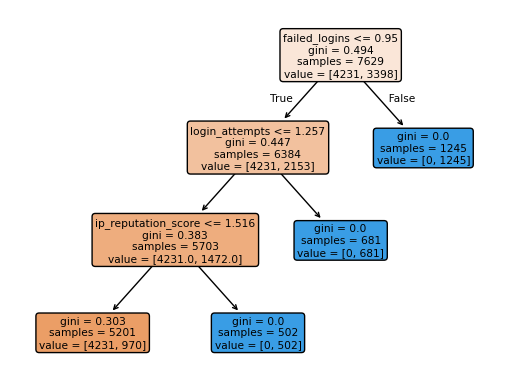

In [198]:
plot_tree(model1, filled=True, rounded=True, feature_names=X.columns)
plt.show()

## **Build Model using Logistic Regression**

In [199]:
model2=LogisticRegression()
model2.fit(X_train, y_train)
y_pred1 = model2.predict(X_test)
acc2 = accuracy_score(y_test, y_pred1)
print("Logistic Regression Accuracy:", acc2)
print("Logistic Regression F1-score:",f1_score(y_test, y_pred1))

Logistic Regression Accuracy: 0.7458071278825996
Logistic Regression F1-score: 0.7048082775410834


## **Build Model using AdaBoost Classifier**

In [176]:
from sklearn.ensemble import AdaBoostClassifier

In [200]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                         n_estimators=10, random_state=42)
ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=10, random_state=42)

In [201]:
print("AdaBoost Accuracy:", accuracy_score(y_test, ada.predict(X_test)))
print("AdaBoost F1-score:",f1_score(y_test, ada.predict(X_test)))

AdaBoost Accuracy: 0.8920335429769392
AdaBoost F1-score: 0.8650065530799476


## **Aggregated Accuracy and F1-score of all the Models**

In [202]:
acc_models = [acc, acc2, accuracy_score(y_test, ada.predict(X_test))]
f1_scores = [f1_score(y_test, y_pred), f1_score(y_test, y_pred1), f1_score(y_test, ada.predict(X_test))]
models = ['Decision Tree', 'Logistic Regression', 'AdaBoost']
print(pd.DataFrame({'Model': models, 'Accuracy': acc_models, 'F1_score': f1_scores}))

                 Model  Accuracy  F1_score
0        Decision Tree  0.867925  0.829730
1  Logistic Regression  0.745807  0.704808
2             AdaBoost  0.892034  0.865007


## **Best Accuracy and F1-score Model**

In [203]:
print('Best Accuracy Model:', models[acc_models.index(max(acc_models))])
print('Best F1-score Model:', models[f1_scores.index(max(f1_scores))])

Best Accuracy Model: AdaBoost
Best F1-score Model: AdaBoost
